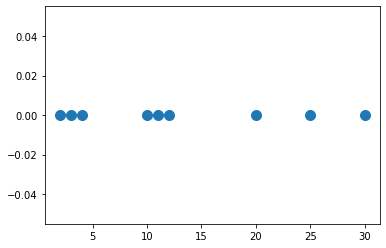

In [1]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import timeit

X = np.array([[2, 0], [3, 0], [4, 0], [10, 0], [11, 0], [12, 0],
              [20, 0], [25, 0], [30, 0]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [6]:
model2 = KMeans(n_clusters=2, init=np.array([[2.5,0],[16,0]]), n_init=1,max_iter=1).fit(X)
c0, c1 = model2.cluster_centers_
c0, c1

(array([3., 0.]), array([18.,  0.]))

In [5]:
model2.score(X)

-333.0

In [10]:
np.mean(X[:,0]), np.mean(X[model1.labels_==0,0]), np.mean(X[model1.labels_==1,0])

(13.0, 3.0, 18.0)

In [13]:
np.count_nonzero(X), np.count_nonzero(X[model1.labels_==0,0]), np.count_nonzero(X[model1.labels_==1,0])

(9, 3, 6)

In [14]:
def separation(model1):
    total_mean=np.mean(X[:,0])
    mean1=np.mean(X[model1.labels_==0,0])
    mean2=np.mean(X[model1.labels_==1,0])
    count1= np.count_nonzero(X[model1.labels_==0,0])
    count2=np.count_nonzero(X[model1.labels_==1,0])
    separation_value=count1*(total_mean-mean1)**2+count2*(total_mean-mean2)**2
    print(separation_value)

In [16]:
separation(model2)

490.05000000000007


In [25]:
#유사도 매트릭스
list1=[]

In [26]:
def s_matrix(model1):
    for i in range(0,np.count_nonzero(X)):
        list1.append([])
        for j in range(0, np.count_nonzero(X)):
            if model1.labels_[i]==model1.labels_[j]:
                list1[i].append(1)
            else:
                list1[i].append(0)

In [27]:
s_matrix(model1)
list1

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [30]:
np.count_nonzero(X), np.bincount(model1.labels_)

(9, array([3, 6], dtype=int64))

In [31]:
def entropy(labels):
    n_labels = len(labels)
    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels
    n_classes = len (probs)
    
    return - np.sum( probs * np.log(probs)) / np.log(n_classes)

In [32]:
entropy(model1.labels_)

0.9182958340544894